# Estudio de colaboraciones en una red social gaitera (con código)

Hoy vamos a estudiar brevemente una red de colaboración entre los miembros de las agrupaciones gaiteras zulianas. La gaita es una tradición vibrante y rica en el estado Zulia, y es por eso que nos hemos adentrado en el mundo de la colaboración y la conexión entre los gaiteras(os), y músicos de estas agrupaciones. Gracias a la extracción de datos de la página web "Sabor Gaitero", hemos podido tener acceso a la información sobre 39 agrupaciones gaiteras y sus respectivos miembros, proporcionándonos una visión única y detallada sobre la dinámica de colaboración en esta red.

Es importante destacar que los miembros de esta red no solo son músicos talentosos, sino también una comunidad unida por su amor por la música gaita y su deseo de preservar y expandir esta tradición en Maracaibo, el Zulia, y toda Venezuela. A través de este estudio, esperamos descubrir patrones interesantes y sorprendentes en la colaboración entre los miembros de esta red y, en última instancia, hacer una contribución valiosa a la comprensión de la dinámica en la comunidad de música gaita en el estado Zulia.

Así que, ¡Acompañenme a indagar en las relaciones ocultas de esta red de colaboraciones entre gaiteros!

### Algo de tecnicalidad...

Para realizar el estudio de las colaboraciones entre agrupaciones gaiteras, vamos a utilizar una librería de Python llamada __NetworkX__, cuya premisa es la creación, manipulación y estudio de grafos matematicos, de los cuales se puede obtener más información de la página de Wikipedia al respecto:

https://es.wikipedia.org/wiki/Teor%C3%ADa_de_grafos

Este notebook va a contener dicho estudio, un poco de explicación del código empleado, y los resultados. En un notebook aparte, vamos a mostrar solo los resultados, junto con un poco de "storytelling" sobre los mismos.

### Los datos

Para recordar, los datos los obtuvimos de la página de miscelaneos gaiteros llamada "Sabor Gaitero", la cuál tiene una sección de agrupaciones gaiteras dónde se comenta varias cosas sobre cada agrupación, e indican algunos miembros del mismo. 

Los datos fueron guardados en un archivo MS Excel, con las siguientes caracteristicas:

* Cada fila es una agrupación gaitera.
* Dos columnas, una llamada TITULO, otra llamada TEXTO, y otra llamada NER.
* Esta última contiene los nombres de cada uno de los integrantes de cada grupo gaitero.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random

import networkx as nx

import matplotlib.cm as cm
import numpy as  np

In [2]:
agrupaciones_df = pd.read_excel('Agrupaciones_NER_flair(v3).xlsx', index_col=0)
agrupaciones_df.fillna('', inplace=True)

In [3]:
agrupaciones_df.head(10)#['NER'][10]

TITULO  \
0                          santanita   
2          cardenales del exito, los   
3                       zagales, los   
4                          maragaita   
5                      barrio obrero   
7                    gran coquivacoa   
8   vhg  (venezuela habla gaiteando)   
9                 gaiteros de ziruma   
10                             racoa   
11               gaiteros de pillopo   

                                                TEXTO  \
0   fundado 1964 gladys vera / raiza portillo / ot...   
2   fundado 1962 ricardo aguirre / ricardo cepeda ...   
3   fundado 1977 daniel méndez / luis germán brice...   
4   fundado 1987 astolfo romero / carlos méndez / ...   
5   fundado 1955 alberto silva / carmencita silva ...   
7   fundado 1968 neguito borjas / osías acosta / e...   
8   fundado 1989 danelo badell / renato aguirre / ...   
9   fundado 2004 ender rojas / alí ojeda / daniela...   
10  fundado 1990 yelitza vílchez / agustín méndez ...   
11  fundado 1980 astolfo romero / danelo badell / ...   

                                                  NER  
0   gladys vera,raiza portillo,raiza portillo,glad...  
2   ricardo aguirre,ricardo cepeda,nerio ríos,jesú...  
3   daniel méndez,luis germán briceño,angel fuenma...  
4   astolfo romero,carlos méndez,gladys vera,astol...  
5   alberto silva,carmencita silva,silva,héctor si...  
7   neguito borjas,osías acosta,ender carruyo,punt...  
8   danelo badell,renato aguirre,heberán añez,rena...  
9   ender rojas,alí ojeda,daniela palma,gerardo mo...  
10  yelitza vílchez,agustín méndez,javier esis,lul...  
11  astolfo romero,danelo badell,eroy chacín,pa qu...

## Creación de Grafo de colaboración


Para poder proceder con el estudio, primero debemos crear el grafo, y para eso, como hemos comentado previamente, vamos a utilizar la librería de Python para el estudio de grafos NetworkX.


Comenzamos definiendo una función que:


* Tomará la columna NER del dataframe, y creará un nodo por cada gaitero.


* Creará un enlace entre cada gaitero y cada miembro principal de la agrupación, si pertenecen a la misma agrupación gaitera.


* Aunque se podría definir que un enlace se forma solo por pertenecer a una agrupación gaitera, por motivos de simplicidad visual hemos decidido lo mencionado. De haber elegido esta modalidad de creación de enlaces habríamos creado un grafo muy denso. Sin embargo, esto es algo que podría explorarse en un futuro estudio.

In [4]:
lista_agrupaciones = agrupaciones_df['TITULO']
colores = cm.jet(np.linspace(0, 1, len(lista_agrupaciones)))
colores_dict = dict(zip(lista_agrupaciones,colores))

def graph_from_agrupaciones(df, colores_dict):
    # Create an empty graph
    G = nx.Graph()

    # Iterate over the rows of the dataframe
    for index, row in df.iterrows():
        cantantes = row['NER'].split(",")
        agrupacion = row['TITULO']
        for cantante in cantantes:
            if cantante != "":
                if G.has_node(cantante.title()):
                    G.nodes[cantante.title()]['grupos'].add(agrupacion)
                else:
                    G.add_node(cantante.title(), grupos={agrupacion}, color=colores_dict[agrupacion])
        G.add_edges_from([(cantantes[0].title(),node.title()) for node in cantantes[1:]])
        
    return G


Instanciamos el grafo que vamos a utilizar, y vemos sus cinco primeros nodos:

In [5]:
G_agru = graph_from_agrupaciones(agrupaciones_df, colores_dict)
for ix,node in enumerate(G_agru):
    print(node)
    if ix==5:
        break

Gladys Vera
Raiza Portillo
José Isea
Astolfo Romero
Danelo Badell
Ricardo Hernández


Quedamos satisfechos, hemos creado el grafo de colaboraciones exitosamente.

## Medidas de centralidad

Las medidas de centralidad son una herramienta fundamental en el análisis de grafos y tienen aplicaciones en diferentes ámbitos, desde la investigación social hasta la investigación en tecnología de la información. En esta sección, nos enfocaremos en el uso de las medidas de centralidad en el análisis de grafos de colaboración entre los distintos Gaiteros. A través de la identificación de los nodos centrales en este grafo, podemos tener una comprensión más profunda de la estructura y dinámica de la colaboración en este sector específico. En esta sección, profundizaremos en las medidas de centralidad y cómo se aplican en el contexto de los grafos de colaboración musical.

Si quieres ahondar en los conceptos matematicos de cada medida de centralidad, te dejo el enlace wikipedia del tema:

https://es.wikipedia.org/wiki/Centralidad

Por lo pronto, analicemos un poco la cantidad de nodos, y de enlaces por nodo (gaitero):

In [6]:
Nodos = len(G_agru)
L = G_agru.size()
degrees = list(dict(G_agru.degree()).values())
kmin = min(degrees)
kmax = max(degrees)
kmean = np.mean(degrees)

print('GRAFO Colaboraciones Gaiteras\n La cantidad de nodos es {} \n La cantidad de enlaces es {}'.format(Nodos, L))
print(' El grado minimo {} \n El grado maximo: {} \n El grado promedio es: {}'.format(kmin,kmax,kmean))

GRAFO Colaboraciones Gaiteras
 La cantidad de nodos es 885 
 La cantidad de enlaces es 1103
 El grado minimo 1 
 El grado maximo: 120 
 El grado promedio es: 2.4926553672316385


# Centralidad de grado (Degree Centrality)

En pocas palabras, mide la cantidad de conexiones de un nodo (gaitero), por lo que entre más alto el numero, más cantidad de conexiones o colaboraciones tiene un gaitero. 


Si realizamos el calculo en nuestro grafo tenemos los siguientes resultados:

In [11]:
centralidad_de_grado=sorted(nx.degree_centrality(G_agru).items(), key=lambda x:x[1], reverse=False)[0:10]
for c_g in centralidad_de_grado:
    print('{} tiene una centralidad de grado de {:.2f}'.format(c_g[0],c_g[1]))

Ricardo Hernández tiene una centralidad de grado de 0.00
Cheo Beceira tiene una centralidad de grado de 0.00
Alberto Villasmil tiene una centralidad de grado de 0.00
Oswaldo Vera tiene una centralidad de grado de 0.00
William Larreal tiene una centralidad de grado de 0.00
Rómulo Enrique Semprún tiene una centralidad de grado de 0.00
Hugo Morales tiene una centralidad de grado de 0.00
Edwing Carrasquero tiene una centralidad de grado de 0.00
Hugo Bohórquez tiene una centralidad de grado de 0.00
Luis Sulbarán tiene una centralidad de grado de 0.00


1. En el primer lugar tenemos a __Astolfo Romero__, él está conectado con aproximadamente 14 % de la red.


2. Seguido muy de cerca por __Ricardo Aguirre__, que está conectado a 13 % de la red.


3. __"Neguito" Borjas__ en tercer lugar, con una centralidad de grado de 9 %.

Fue entonces Astolfo Romero el gaitero mejor conectado de su epoca, con la centralidad de grado mayor dentro de la red evalauda. Y no es extraño para quienes conocen un poco del mundo de la Gaita, "El Parroquiano" fue un gaitero muy querido, y participó en muchas agrupaciones gaiteras.

In [8]:
nodo = 'Astolfo Romero'
num_groups = len(G_agru.nodes[nodo]['grupos'])
print('El gaitero', nodo, "perteneció a", num_groups, "agrupaciones gaiteras.")

El gaitero Astolfo Romero perteneció a 9 agrupaciones gaiteras.


Si inspeccionamos a cuantas agrupaciones gaiteras perteneció Gladyv Vera en nuestro grafo, tenemos:

In [9]:
nodo = 'Gladys Vera'
num_groups = len(G_agru.nodes[nodo]['grupos'])
print('La gaitera', nodo, "perteneció a", num_groups, "agrupaciones gaiteras.")

La gaitera Gladys Vera perteneció a 4 agrupaciones gaiteras.


## Grafico de la centralidad de grado

A continuación, veremos un gráfico que nos muestra visualmente la centralidad de grado, y podemos apreciar lo siguiente:

* El color, y los tamaños de los nodos codifican el índice de centralidad de grado, por lo tanto, si un nodo tiene un tamaño grande, significa que tiene una centralidad de grado mayor, y los nodos con cierto rango de centralidad de grado tendrán colores parecidos.

* El top 10 anterior tendrá etiqueta con su nombre, para su fácil identificación.

* Podemos entonces apreciar que la mayoría de los nodos tienen un tamaño pequeño, y una tonalidad cercana al azul, y solo los nodos más grandes (es decir, con mayor centralidad de nodo) tienen colores distintos.

In [10]:
from itertools import combinations

In [6]:
def plot_graph_with_centrality(G, centralidad, layout, ax, alpha_global):
    """
    Función que genera un gráfico a partir de un objeto "Grafo" de NetworkX.
    
    Params:
        * G -> un objeto NetworkX graph.
        * centralidad -> un objeto cadena de texto indicando el tipo de centralidad a graficar.
        * layout -> un objeto cadena de texto que indica el tipo de algoritmo de posicionamiento
        que tendrán los nodos del grafo.
        * ax -> un objeto Axes de Matplotlib.
        * alpha_global -> un dato tipo "float" que indica la transparencia del dibujo de red.
        
    Returns:
        * Un gráfico del grafo.
    """
    
    
    # Calcula la centralidad de grado del grafo
    if centralidad == 'Between':
        centrality = nx.betweenness_centrality(G)
        titulo = 'Intermediación'
    if centralidad == 'Degree':
        centrality = nx.degree_centrality(G)
        titulo = 'Grado'
    if centralidad == 'Close':
        centrality = nx.closeness_centrality(G)
        titulo = 'Cercanía'
    if centralidad == 'Eigenvector':
        centrality = nx.eigenvector_centrality(G)
        titulo = 'Vector Propio'
    
    # Ajusta el tamaño de los nodos según su centralidad de grado
    node_sizes = [centrality[node] * 10000 for node in G.nodes()]
    
    # Ajusta el color de los nodos según su centralidad de grado
    node_colors = [centrality[node] for node in G.nodes()]
    
    if layout == 'Kawai':
        pos = nx.kamada_kawai_layout(G)
#         pos['Ricardo Aguirre'] += (0.4, 0.4)
    elif layout == 'Circular':
        pos = nx.circular_layout(G)
    elif layout == 'Spring':
        pos = nx.spring_layout(G)
    elif layout == 'Planar':
        pos = nx.planar_layout(G)
    elif layout == 'Spectral':
        pos = nx.spectral_layout(G)
    elif layout == 'Shell':
        pos = nx.shell_layout(G)
    
    # Dibuja el gráfico
    nx.draw(
        G,
        node_size=node_sizes,
        node_color=node_colors,
        cmap=plt.cm.jet,
        with_labels=False,
        pos=pos,
        ax=ax,
        alpha=alpha_global,
    )
    
    # Añade las etiquetas a los nodos del top 10 de ranking
    sorted_nodes = sorted(centrality, key=centrality.get, reverse=True)
    top_10 = sorted_nodes[:10]
    labels = {node: node for node in top_10}
    
    # Dibuja las etiquetas
    nx.draw_networkx_labels(
        G,
        pos,
        labels,
        font_size=8,
        ax=ax,
        alpha=alpha_global
    )
    for node in top_10:
        x, y = pos[node]
        plt.text(
            x,
            y,
            node,
            bbox=dict(
                facecolor='white',
                alpha=alpha_global,
            ),
                 ha="center",
                 va="center"
        )
    
    ax.set_title('Colaboraciones Gaiteras, resaltando la "Centralidad de {}"'.format(titulo), fontsize=15)


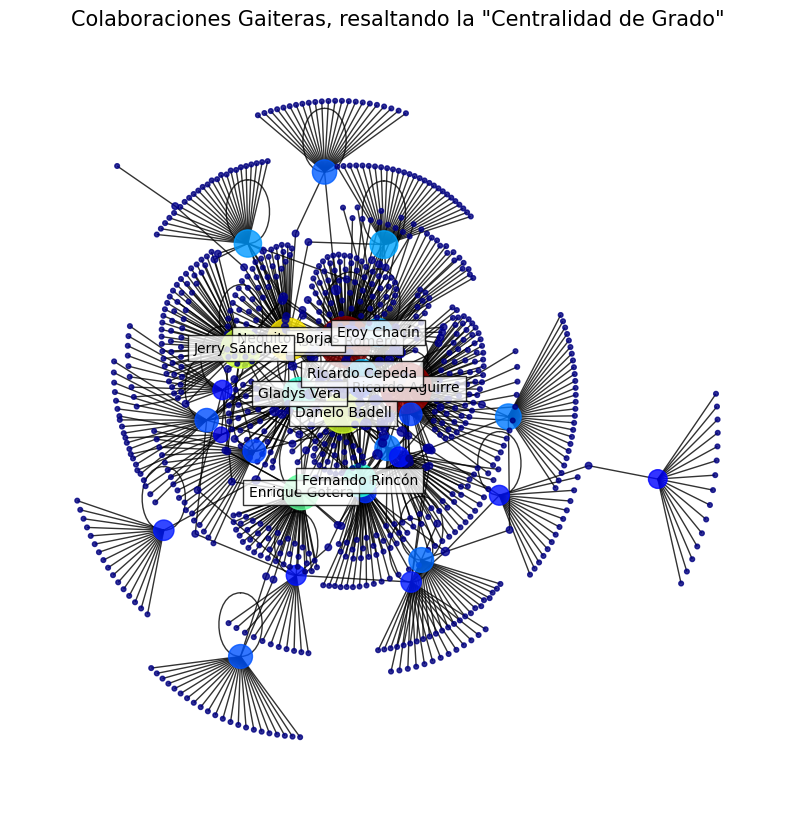

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
plot_graph_with_centrality(G_agru, 'Degree', 'Kawai', ax, 0.8)
plt.plot()
plt.show()


# Centralidad de intermediación (Betweenness Centrality)

La centralidad de intermediación nos indica qué tan importante es un nodo en el flujo de información de un grafo, debido a que mide la cantidad de veces que un nodo es incluido en todos los caminos de una red.

En pocas palabras: un gaitero con una centralidad de intermediación elevada indica que ella/él es importante para el flujo de la información en la red bajo estudio, debido a que la información que se origine en cualquier parte de la red tiene una alta probabilidad de pasar por ella/él.

Si realizamos el cálculo en nuestro grafo tenemos los siguientes resultados:

In [14]:
centralidad_de_intermediacion=sorted(nx.betweenness_centrality(G_agru, normalized = True, endpoints = False).items(), key=lambda x:x[1], reverse=True)[0:10]
for c_i in centralidad_de_intermediacion:
    print('{} tiene una centralidad de intermediación de {:.2f}'.format(c_i[0],c_i[1]))

Danelo Badell tiene una centralidad de intermediación de 0.29
Astolfo Romero tiene una centralidad de intermediación de 0.28
Ricardo Aguirre tiene una centralidad de intermediación de 0.22
Neguito Borjas tiene una centralidad de intermediación de 0.20
Enrique Gotera tiene una centralidad de intermediación de 0.18
Jerry Sánchez tiene una centralidad de intermediación de 0.13
Fernando Rincón tiene una centralidad de intermediación de 0.12
Gladys Vera tiene una centralidad de intermediación de 0.12
Ricardo Cepeda tiene una centralidad de intermediación de 0.08
Arsacio Acurero tiene una centralidad de intermediación de 0.07


1. __Danelo Badell__ es el gaitero con mayor flujo de información dentro de nuestra red de colaboración, seguido muy de cerca por __Astolfo Romero__.


2. Vuelven a aparecer __"Neguito"__ y __Gladys Vera__ en este top 10, lo que vuelve a indicar su importancia dentro del mundo de la gaita de la red evaluada, y específicamente en esta medición de centralidad como lo es la "Centralidad de Intermediación", nos indica que también son importantes para el flujo de información.


3. __Danelo Badell__, __Astolfo Romero__, __Ricardo Aguirre__ y __"Neguito" Borjas__, probaron ser miembros importantes en este grafo, todos tienen un índice de __"Centralidad de Intermediación"__ por encima o igual a 20 %, por lo que podríamos catalogarlos como los __portales/corredores del mundo de la gaita__ en nuestra red, la mayor cantidad de información y colaboraciones pasan por sus manos.
La centralidad de intermediación nos indica qué tan importante es un nodo en el flujo de información de un grafo, debido a que mide la cantidad de veces que un nodo es incluido en todos los caminos de una red.

En pocas palabras: un gaitero con una centralidad de intermediación elevada indica que ella/él es importante para el flujo de la información en la red bajo estudio, debido a que la información que se origine en cualquier parte de la red tiene una alta probabilidad de pasar por ella/él.

## Grafico de la centralidad de intermediación

A continuación, veremos un gráfico que nos muestra visualmente la centralidad de intermediación, y podemos apreciar lo siguiente:

* El color, y los tamaños de los nodos codifican el índice de centralidad de intermediación al igual que el gráfico anterior.


* El top 10 anterior tendrá etiqueta con su nombre, y Danelo Badell, y Astolfo Romero tienen el mismo color, por lo que su centralidad de mediación es muy alta, lo que indica que muchas colaboraciones entre agrupaciones pasan por ambos.


* Gladys Vera, Fernando Rincón, y Jerry Sánchez tienen el mismo color y tamaño, indicando que tienen una centralidad de intermediación similar, y una cantidad similar de colaboraciones y de información deben pasar por ellos en la red.


* Vemos que la mayoría de los nodos no tiene un círculo, esto indica que poca información o colaboraciones pasan por sus manos.



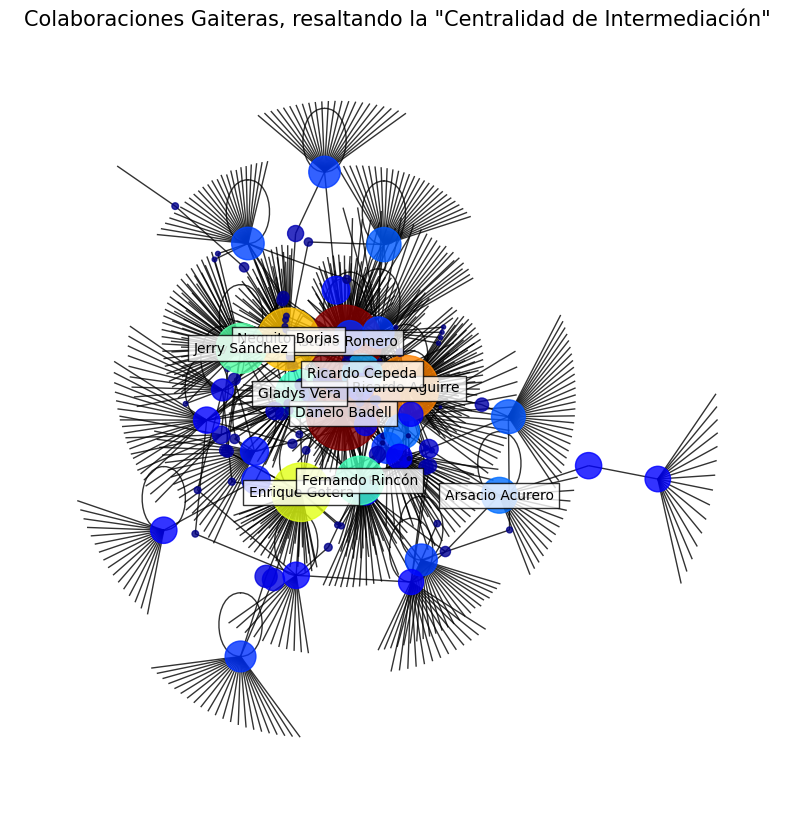

In [195]:
fig, ax = plt.subplots(figsize=(10,10))
plot_graph_with_centrality(G_agru, 'Between', 'Kawai', ax, 0.8)

# Centralidad de cercanía (Closeness Centrality)

La centralidad de cercanía es un indicativo de cuán cercano un nodo está del resto de los nodos en un grafo, es decir, que un nodo con alta centralidad de cercanía puede distribuir la información a muchos nodos de manera rápida, y fácil.

Otra manera de ver esta medida es que los nodos (gaiteros) con una alta medida de __"Centralidad de Cercanía"__ son los nodos con los caminos más cortos hacia ella/él desde el resto de los miembros de la red.


Si realizamos el cálculo en nuestro grafo tenemos los siguientes resultados:


In [16]:
centralidad_de_cercania=sorted(
    nx.closeness_centrality(G_agru).items(),
    key=lambda x:x[1],
    reverse=True)[0:10]
for c_c in centralidad_de_cercania:
    print('{} tiene una centralidad de cercanía de {:.2f}'.format(c_c[0],c_c[1]))

Danelo Badell tiene una centralidad de cercanía de 0.40
Astolfo Romero tiene una centralidad de cercanía de 0.39
Ricardo Cepeda tiene una centralidad de cercanía de 0.37
Ricardo Aguirre tiene una centralidad de cercanía de 0.36
Neguito Borjas tiene una centralidad de cercanía de 0.36
Gladys Vera tiene una centralidad de cercanía de 0.35
Luis Germán Briceño tiene una centralidad de cercanía de 0.33
Douglas Ochoa tiene una centralidad de cercanía de 0.33
Enrique Gotera tiene una centralidad de cercanía de 0.33
Fernando Rincón tiene una centralidad de cercanía de 0.33


1. Vemos que __Ricardo Cepeda__ entra en el top 3 de esta lista, lo que nos indica que es uno de los nodos más cercanos dentro de la comunidad de gaiteros que estamos estudiando.


2. Siguen __Danelo Badell__ y __Astolfo Romero__ muy de cerca siendo los gaiteros más importantes dentro de la red de colaboraciones de agrupaciones gaiteras, teniendo los índices de __"Centralidad de Cercanía"__ más altos. Una vez más, estos gaiteros fueron muy importantes, y cercanos a los demás gaiteros.

3. Otro gaitero que ha aparecido en todos los rankings es __Fernando Rincón__, __"El Romántico de la Gaita"__, quién en esta oportunidad demuestra tener una cercanía con el resto de la comunidad estudiada.

## Grafico de la centralidad de Cercanía

A continuación, veremos un gráfico que nos muestra visualmente la centralidad de intermediación, y podemos apreciar lo siguiente:

* El color, y los tamaños de los nodos codifican el índice de centralidad de cercanía al igual que el gráfico anterior


* La tonalidad de color, y el tamaño de casi todos los nodos es parecido, lo que indica que hay mucha cercanía en la comunidad gaitera, dejando a la mayoría de las(os) gaiteros con un índice de cercanía muy parecido.


* Los gaiteros del top 10 tienen una tonalidad de color distinta, sin embargo, es difícil verlos debido a la cantidad de nodos aglomerados.


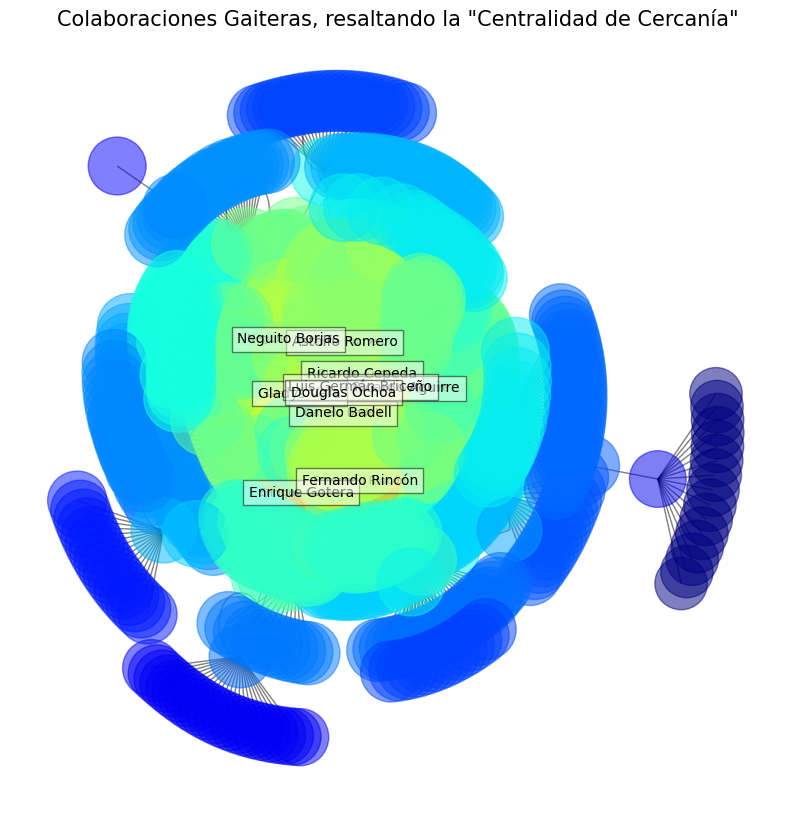

In [294]:
fig, ax = plt.subplots(figsize=(10,10))
plot_graph_with_centrality(G_agru, 'Close', 'Kawai', ax, 0.5)

# Centralidad de vector propio (Eigenvector Centrality)

La centralidad de vector propio indica que tan bien conectado está un nodo, es decir, que tan importante son los nodos vecinos del nodo bajo estudio, dándonos una idea de la calidad de conexiones de un nodo.

Si realizamos el cálculo en nuestro grafo tenemos los siguientes resultados:

In [18]:
centralidad_eigenvector=sorted(
    nx.eigenvector_centrality(G_agru, max_iter=600).items(),
    key=lambda x:x[1], reverse=True)[0:10]
for c_e in centralidad_eigenvector:
    print('{} tiene una centralidad de cercanía de {:.2f}'.format(c_e[0],c_e[1]))

Astolfo Romero tiene una centralidad de cercanía de 0.43
Ricardo Aguirre tiene una centralidad de cercanía de 0.42
Danelo Badell tiene una centralidad de cercanía de 0.31
Ricardo Cepeda tiene una centralidad de cercanía de 0.20
Neguito Borjas tiene una centralidad de cercanía de 0.18
Gladys Vera tiene una centralidad de cercanía de 0.13
Fernando Rincón tiene una centralidad de cercanía de 0.12
Daniel Méndez tiene una centralidad de cercanía de 0.11
Renato Aguirre tiene una centralidad de cercanía de 0.10
Luis Germán Briceño tiene una centralidad de cercanía de 0.10


1. De nuevo __Astolfo Romero__, y __Ricardo Cepeda__ en la punta, y muy por encima del resto. Ellos son los gaiteros con las conexiones de mejor calidad en la red en evaluación, es decir, sus vecinos también se encuentran bien conectados.


2. Podríamos decir que __Danelo Badell__, y __Neguito Borjas__ están en segundo lugar, por encima del resto, y también sus vecinos tienen excelentes conexiones.

## Grafico de la centralidad de Vector Propio

A continuación, veremos un gráfico que nos muestra visualmente la centralidad de vector propio, y podemos apreciar lo siguiente:

* La mayoría de nodos tienen tonalidades azules, y tamaños similares, sin embargo destacan Danelo Badell, Astolfo Romero, y Ricardo Aguirre como los gaiteros con vecinos más importantes, es decir, son ellos los que tienen las mejores conexiones de la red bajo estudio.

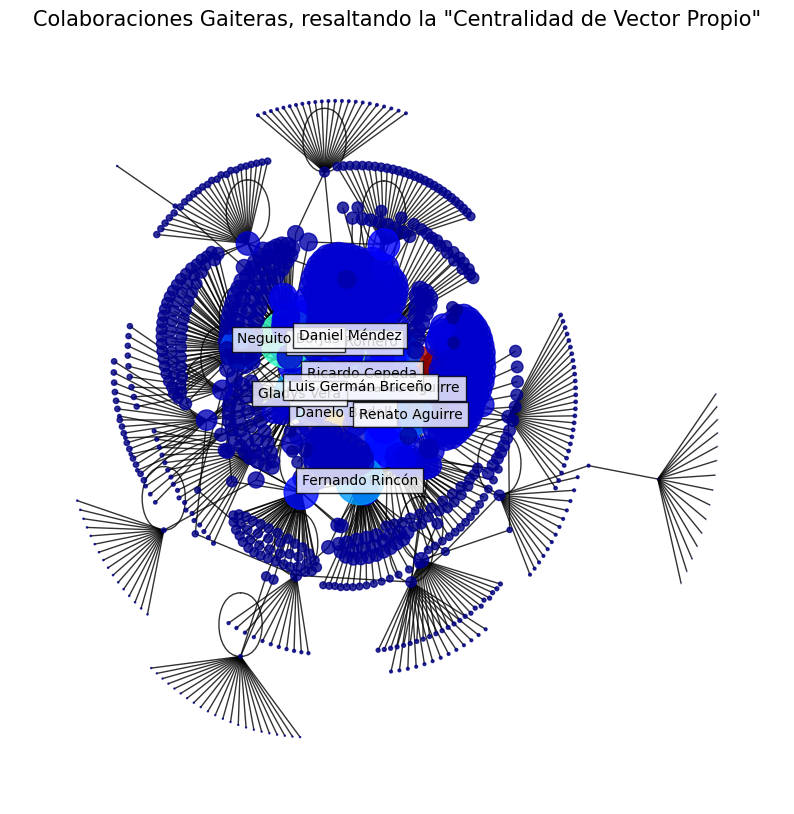

In [103]:
fig, ax = plt.subplots(figsize=(10,10))
plot_graph_with_centrality(G_agru, 'Eigenvector', 'Kawai', ax, 0.8)

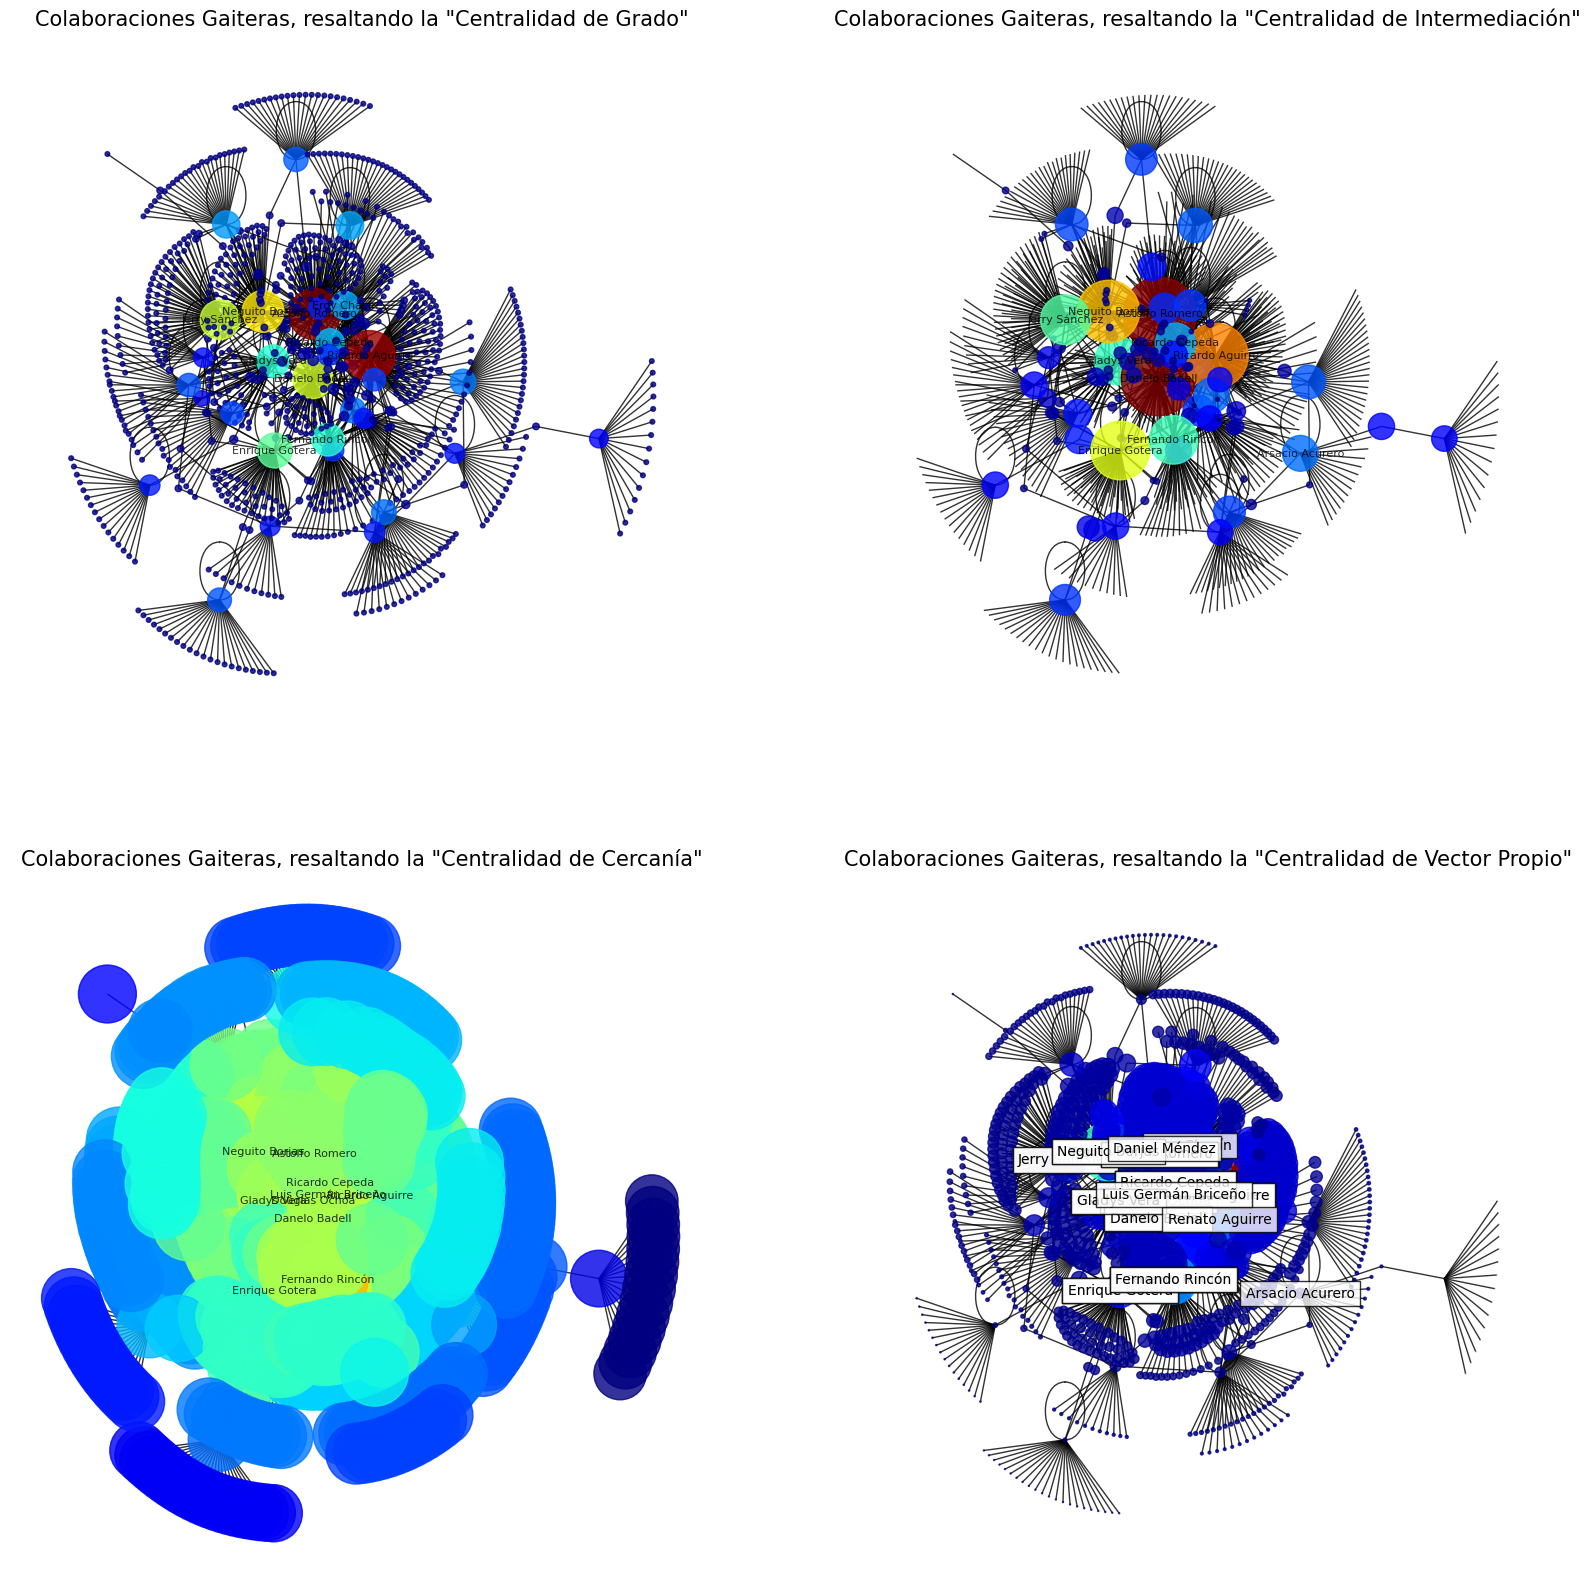

In [20]:
fig, axes = plt.subplots(2,2,figsize=(20,20))
mediciones = ['Degree','Between','Close','Eigenvector']

for medicion,ax in zip(mediciones,axes.flatten()):
    plot_graph_with_centrality(G_agru, medicion, 'Kawai', ax, 0.8)

## Efecto "Mundo pequeño"


Nuestra red de "gaiteros" demuestra ser altamente conectada, tal y como vimos en la sección de __"Centralidad de Cercanía"__. Esta alta conectividad indica una fuerte colaboración y una gran capacidad de interacción entre los "gaiteros" de la red.

Este fenómeno recibe el nombre de "Efecto de Mundo Pequeño" en la cultura pop, el cual ha sido visitado y revisitado varias veces, siendo una de sus instancias más conocidas la frase: __"seis grados de separación"__, la cual generó la publicación de libros, peliculas y demás apariciones en distintos medios de comunicación. El origen del estudio de este fenómeno se atribuye al experimento realizado por __Stanley Milgram__ en la decada de los 60, del cual puedes ahondar en su página de Wikipedia:

https://es.wikipedia.org/wiki/Stanley_Milgram


### Una comunidad Gaitera muy cercana

Un resumen de la base teórica sobre el efecto de mundo pequeño es la siguiente:

* Las redes que presentan este fonomeno poseen un indice de "clustering", o agrupamiento, el cual representa la densidad de enlaces entre nodos cercanos, muy alto en muchos de sus nodos.


* Adicionalmente también poseen una alta densidad de caminos cortos entre los nodos que la componen.


* Este último punto es la razon principal por el cual este fenomeno recibe su nombre, porque:


    - La separación entre dos nodos (saltos, o en el caso de nuestra red, gaiteros), en promedio, es mucho más pequeña que la cantidad de enlaces de la red completa, incluso varios ordenes de magnitud más pequeña.
    - Pues entonces, la cantidad de gaiteros que deben colaborar para comunicar a otros dos gaiteros elegidos al azar es relativamente más pequeña que la cantidad de enlaces o colaboraciones totales.


Ya vimos en acción este fenomeno en las secciones anteriores, entonces lo que queda es cuantificarlo, y eso es lo que haremos:

* Priemero recordemos que la red de colaboraciones entre gaiteros tiene:
    
    
    - __885__ nodos o gaiteros.
    - __1103__ enlaces o colaboraciones entre gaiteros, recordemos que cada enlace se forma si dos gaiteros o músicos trabajan juntos en alguna agrupación gaitera.
    
   
Con la ayuda de funciones de NetworkX calculemos algunos datos sobre la red:

In [13]:
nodos = 885
kmean = 2 * 1103 / nodos
p = kmean / (nodos - 1)

# Debido a la naturaleza aleatoria de la función "nx.erdos_renyi" debemos
# realizar varios experimentos de calculo del coeficiente de watts_strogatz
n_trials = 100
clustering_coeffs = []
for i in range(n_trials):
    G_random = nx.erdos_renyi_graph(nodos, p)
    clustering_coeffs.append(nx.average_clustering(G_random))

clustering_coef = nx.average_clustering(G_agru)
avg_path_lenght = nx.average_shortest_path_length(G_agru)
watts_strogatz_coeff = clustering_coef / np.mean(clustering_coeffs)


print('Coeficiente de agrupamiento ("clustering"): {:.4f}'.format(clustering_coef ))
print("Longitud de camino promedio: {:.4f}".format(avg_path_lenght))
print("Coeficiente Watts-Strogatz: {:.4f}".format(watts_strogatz_coeff))

Coeficiente de agrupamiento ("clustering"): 0.0507
Longitud de camino promedio: 4.1860
Coeficiente Watts-Strogatz: 28.2999


Los resultados obtenidos tienen mucha información contenida, por lo que vamos a comentar uno a uno:

### Coeficiente de "clustering"


    *  El coeficiente de clustering va de 0 a 1, por lo que el resultado obtenido para nuestra red de __0,0507__ es bajo.
    * Este coeficiente de clustering cobra sentido si analizamos de cerca como funcionan las agrupaciones gaiteras, tomemos como ejemplo a la agrupación __Gaiteros de Pillopo__:
        - Fue fundada en agosto de 1980 por Luis Adolfo Camacho “Pillopo” , Alfredo Maldonado, Gabriel Díaz, Humberto Bracho y Luis Adolfo Camacho hijo, es decir cinco nodos.
        - Y tiene 60 miembros adicionales entre cantantes y músicos
    * Lo anterior nos indica que, los 64 miembros del grupo se conectan solo con Luis Adolfo Camacho directamente, y a menos que hayan pertenecido a una agrupacion gaitera adicional, no tendrán otro enlace dentro de la red.
    * Como este comportamiento se repite en toda la red, entonces los nodos tendrían vecinos poco conectados, resultando en el coeficiente observado.
    
    
## Un futuro estudio

Al observar el comportamiento visto con el coeficiente de clustering nos asalta una duda: ¿Qué tanto cambiaría la red, su grafo, y los resultados obtenidos si elegimos un enfoque diferente para la creación de enlaces?

Dejemos esta inquietud para un futuro estudio.


### Longitud de camino promedio

    * Un camino dentro de una red se refiere a los saltos de un nodo a otro (a través de enlaces existentes) que existen en un grafo.
    * La red de colaboraciones entre gaiteros tiene un tamaño de salto promedio de __4.1860__, para llegar de cualquier nodo de la red a otro.
    * En este estudio de Facebook:
    
    
    https://research.facebook.com/blog/2016/2/three-and-a-half-degrees-of-separation/
    
    
    donde Meta explora este mismo fenomeno que estamos estudiando, ellos llegan a la conclusión de que todos estamos separados de cualquier otra persona en el mundo, por apenas __3,57__ saltos.
    * Tomando en cuenta lo anterior, entonces podemos inferir que la red bajo estudio presenta una caracteristica vista en las redes con fenomeno de "mundo pequeño": una longitud de camino promedio entre tres, y seis.
    
### Coeficiente de Watts-Strogatz

    * Para ahondar en este coeficiente mejor le pido al lector echar un vistazo a la página de Wikipedia del modelo:
    
    
    https://es.wikipedia.org/wiki/Modelo_Watts_y_Strogatz
    
    
    * La red estudiada tiene un __"coeficiente de Watts-Strogatz"__ de 28,2999.
    * Un coeficiente WS tan elevado significa definitivamente que la red presenta el fenomeno de "mundo pequeño".
    * Normalmente las redes con alto coeficiente WS tienen tambien un alto coeficiente de "clustering", sin embargo, la nuestra no, y como explicamos en la sección anterior, este coeficiente de "clustering" está bien fundado.
    * Entonces:
    
    
   ## ¿Como explicamos el fenomeno de "mundo pequeño"?
   
   
    * La respuesta que tengo es que existe una red adicional embedida dentro de la red evaluada, y esto lo vamos a explorar en la siguiente entrega.
    
    
En definitiva, la red estudiada es una red de __alta colaboración__, con varios nodos importantes, que han hecho numerosas e importantes contribuciones a la escena gaitera, y con caminos para la colaboración bastante cortos.

## Gráficos para ver el efecto de mundo pequeño en acción:

Para apoyar visualmente la presencia del fenomeno estudiado, vamos a crear una imagen que muestre las conexiones de un nodo especifico como centro, dentro de un radio de conexión dado. Este grafico nos va a mostrar claramente como un nodo poco conectado puede alcanzar a la mayoría de la red con tan solo cuatro saltos.

Para demostrar aún más el fenomeno, primero veamos un nodo altamente conectado, como Ricardo Cepeda:

In [7]:
def plot_node_and_connections(G, node, n, ax):
    # Obtiene un subgrafo de los primeros vecinos de n saltos del nodo
    subgraph = nx.ego_graph(G, node, radius=n, center=True)

    # Establezca el tamaño y el color del nodo en función de su distancia desde el nodo principal
    node_size = [3000 if nx.shortest_path_length(G, node, n) == 0 else 50/(nx.shortest_path_length(G, node, n)) for n in subgraph.nodes()]
    node_color = [nx.shortest_path_length(G, node, n) for n in subgraph.nodes()]
    color_map = plt.get_cmap("jet")
    node_colors = [color_map(c/n) for c in node_color]

    # Dibuja el subgrafo
    pos = nx.kamada_kawai_layout(subgraph)
    nx.draw(
        subgraph,
        with_labels=False,
        node_size=node_size,
        node_color=node_colors,
        pos=pos,
        ax=ax
    )

    # Agregar una etiqueta solo al nodo principal
    labels = {node:node}
    nx.draw_networkx_labels(
        subgraph,
        pos,
        labels=labels,
        font_size=10,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=1),
        ax=ax
    )

    # Agregue un cuadro de texto para mostrar el número de nodos en el gráfico
    text = "Cantidad de nodos: {}".format(len(pos))
    bbox_props = dict(boxstyle="square,pad=0.3", fc="white", alpha=0.8)
    ax.text(0.95, 0.05, text, ha="right", va="bottom", transform=ax.transAxes, fontsize=10, bbox=bbox_props)

    # Agregue una leyenda para codificar el nivel de conexión
    handles = []
    for i in range(n+1):
        handles.append(plt.Rectangle((0,0),1,1,fc=color_map(i/n)))
    ax.legend(handles, [f"Nivel {i}" for i in range(n+1)], title="Radio de conexión")

## Para Ricardo Cepeda:

Ricardo Cepeda tiene __37__ conexiones directas, y en el cuarto nivel, alcanza rápidamente a casi la totalidad de la red, demostrando lo altamente conectada que se encuentra la comunidad gaitera, y de nuevo, que el efecto de "Mundo Pequeño" se encuentra presente en la mayoría de redes sociales:

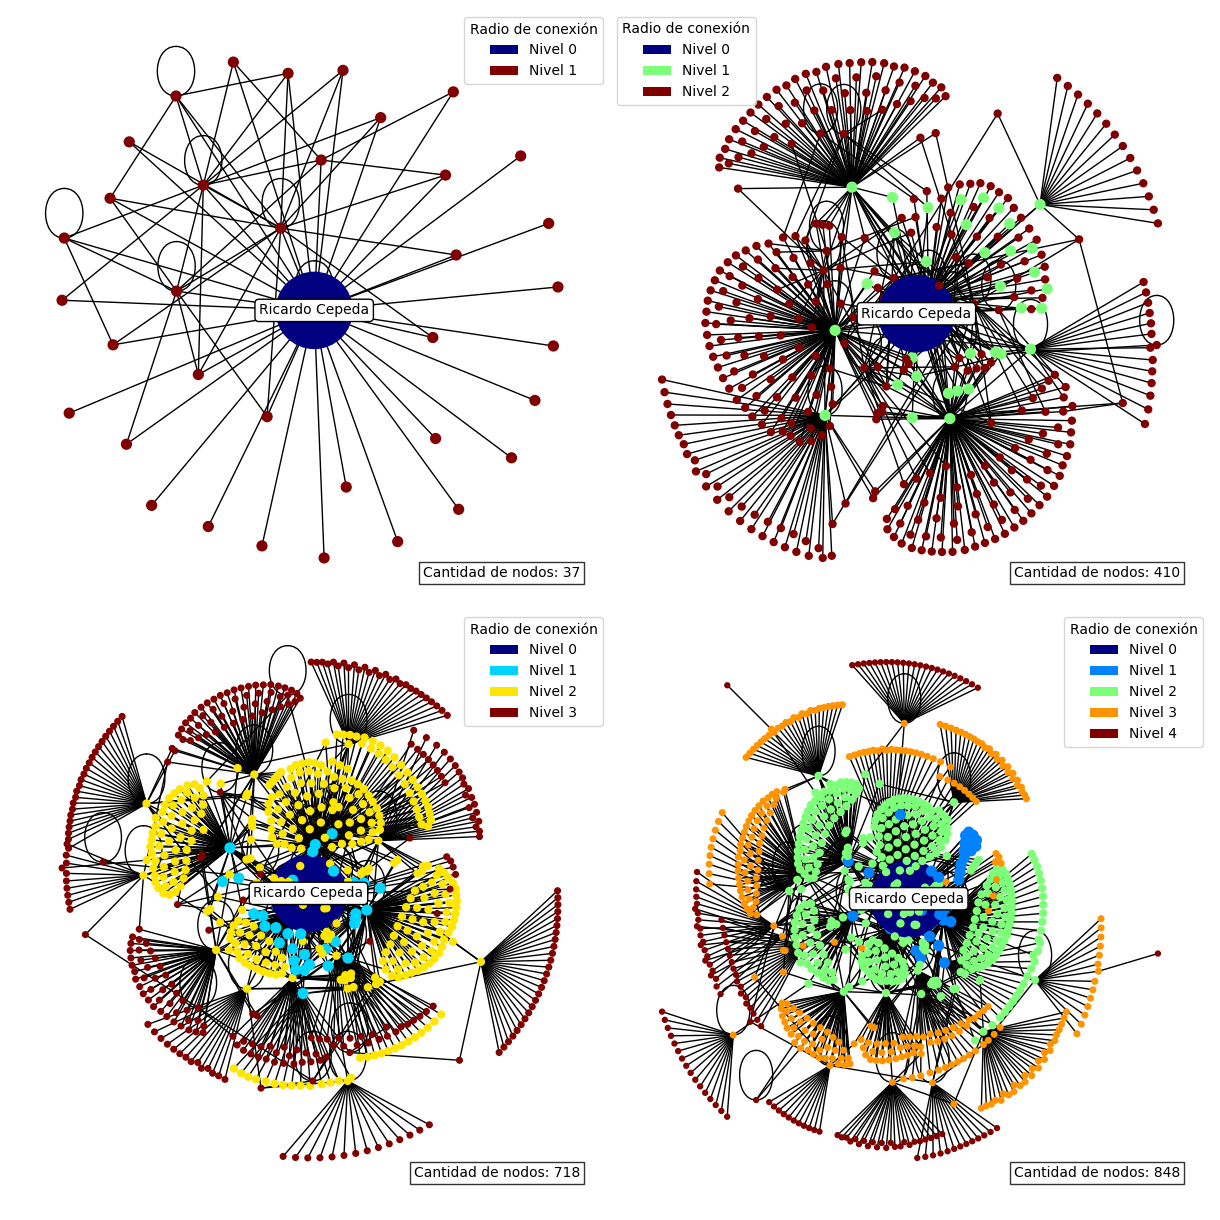

In [32]:
fig, axes = plt.subplots(2,2, figsize=(12,12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace=0, hspace=0)

for level,ax in zip(range(1,5), axes.flatten()):
    plot_node_and_connections(G_agru, 'Ricardo Cepeda', level, ax)

## Para Gladys Vera


Gladys Vera tiene __47__ conexiones directas, y en el cuarto nivel, alcanza rápidamente a casi la totalidad de la red, demostrando lo altamente conectada que se encuentra la comunidad gaitera, y de nuevo, que el efecto de "Mundo Pequeño" se encuentra presente en la mayoría de redes sociales:

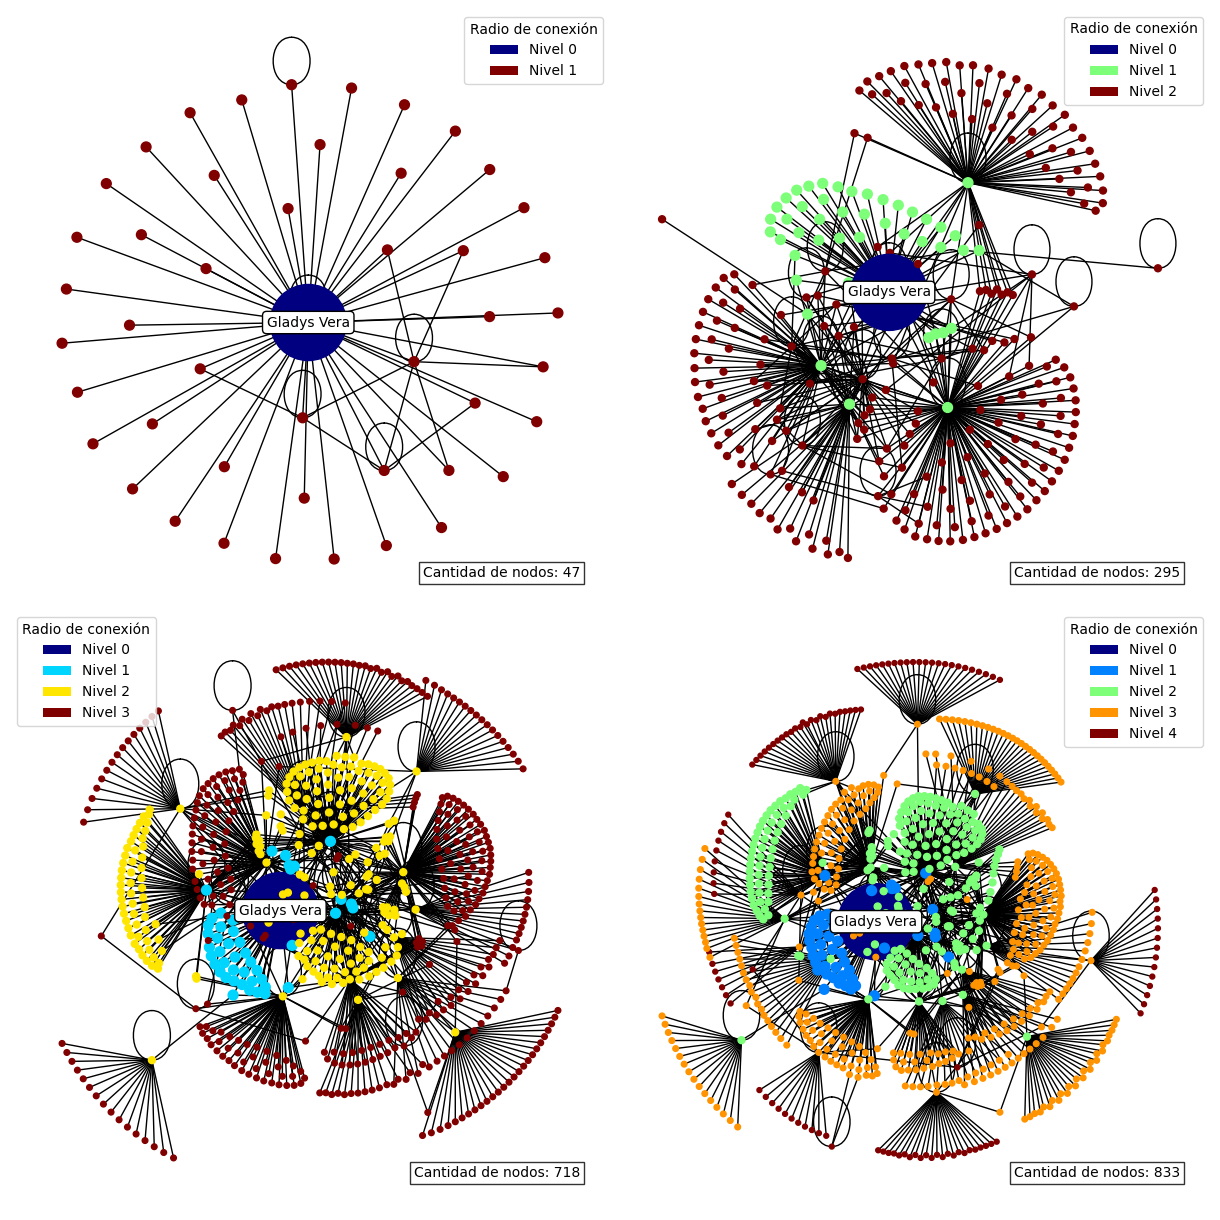

In [12]:
fig, axes = plt.subplots(2,2, figsize=(12,12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace=0, hspace=0)

for level,ax in zip(range(1,5), axes.flatten()):
    plot_node_and_connections(G_agru, 'Gladys Vera', level, ax)

Si elegímos un gaitero (o músico) con un grado bajo (numero de conexiones bajo), como __Cheo Beceira__, vemos aun más acentuado el efecto de mundo pequeño de nuestra red.

## Caminos en la red de colaboraciones

Y como última sección, vamos a explorar uno de los caminos más largos dentro de este emocionante ecosistema musical. Con la ayuda de un gráfico, vamos a ver cómo los músicos colaboran entre sí y cómo sus carreras musicales están interconectadas.

In [10]:
def plot_path(G, source, target):
    path = nx.shortest_path(G, source, target)
    pos = nx.kamada_kawai_layout(G)
    
    node_colors = ['lightgrey' if node not in path else 'blue' for node in G.nodes()]
    node_sizes = [2000 if node in (source, target) else 500 if node in path else 100 for node in G.nodes()]
    
    filtered_edges = [(u, v) for u, v in G.edges() if u != v]
    edge_colors = ['lightgrey' if not (edge[0] in path and edge[1] in path) else 'red' for edge in filtered_edges]
    edge_width = [0.5 if not (edge[0] in path and edge[1] in path) else 7 for edge in filtered_edges]
    
    nx.draw(G, pos, nodelist=G.nodes(), edgelist=filtered_edges, node_color=node_colors, node_size=node_sizes, edge_color=edge_colors, width=edge_width, with_labels=False, alpha=0.5)
    
    labels = {node: node for node in path}
    nx.draw_networkx_labels(G, pos, labels, font_color='white', bbox={'facecolor':'black', 'edgecolor':'none', 'alpha':0.7}, font_size=8)
    
    plt.title('Camino entre {}, y {} dentro de la red'.format(source,target), fontsize=15)
    
    plt.show()

Hemos tomado a dos gaiteros/músicos al azar:

* "Magaly" de la agrupación gaitera __Las Alondras__.
* Norvyns Sánchez, de la agrupación __Racoa__.

Entre ellos hay 7 nodos intermedios, lo que lo hace uno de los caminos más largos de la red.

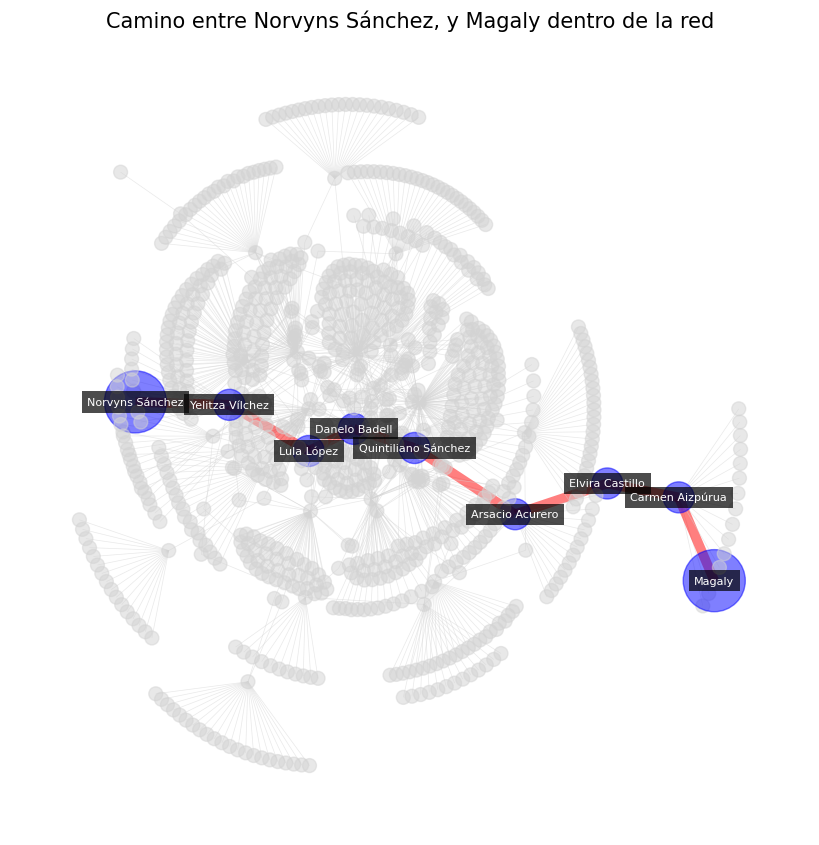

In [33]:
fig = plt.figure(figsize=(8,8))
plot_path(G_agru, 'Norvyns Sánchez', 'Magaly')

Realizado por: __Alexander Medina__